In [261]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
%pylab inline

engine = create_engine('sqlite:///jagged.sqlite')



Populating the interactive namespace from numpy and matplotlib


In [262]:
sentiment = pd.read_sql_query("SELECT * FROM sentiment WHERE Date > '1990-01-02'", engine, parse_dates={'Date':'%Y-%m-%d'})
sentiment['BullBearSpread'] =  sentiment['Bullish'] - sentiment['Bearish']
sentiment = sentiment[['Date','BullBearSpread']]
sentiment.head(), sentiment.tail()

(        Date  BullBearSpread
 0 1990-01-05            0.10
 1 1990-01-12            0.28
 2 1990-01-19            0.11
 3 1990-01-26           -0.14
 4 1990-02-02           -0.33,            Date  BullBearSpread
 1396 2016-10-13       -0.082547
 1397 2016-10-20       -0.140756
 1398 2016-10-27       -0.093137
 1399 2016-11-03       -0.106818
 1400 2016-11-10        0.095556)

In [263]:
#sentiment['BullBearSpread'] = pd.qcut(sentiment['BullBearSpread'],4,labels=False)
sentiment.set_index('Date',inplace=True)
sentiment.head()

,BullBearSpread
Date,
1990-01-05,0.10
1990-01-12,0.28
1990-01-19,0.11
1990-01-26,-0.14
1990-02-02,-0.33


In [264]:
'''# Get price and volume data for DJIA stocks

tickers = ['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DD', 'DIS', 'GE', 'GS',
           'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 
           'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WMT', 'XOM']

for index, ticker in enumerate(tickers):    
    if index==0: 
        query = pd.read_sql_query("SELECT date as Date, adj_close as {}, adj_volume as {}Vol \
                              FROM ohlc \
                              WHERE ticker == '{}'  \
                              AND date > '1987-06-26'".format(ticker,ticker,ticker,ticker), engine, parse_dates={'Date':'%Y-%m-%d'})
        prices = query
    else:    
        query = pd.read_sql_query("SELECT date as Date, adj_close as {}, adj_volume as {}Vol \
                              FROM ohlc \
                              WHERE ticker == '{}'  \
                              AND date > '1987-06-26'".format(ticker,ticker,ticker,ticker), engine, parse_dates={'Date':'%Y-%m-%d'})
        prices = prices.merge(query, on='Date',how='outer')
    
prices.to_csv('dow_stock_prices.csv')'''

'# Get price and volume data for DJIA stocks\n\ntickers = [\'AAPL\', \'AXP\', \'BA\', \'CAT\', \'CSCO\', \'CVX\', \'DD\', \'DIS\', \'GE\', \'GS\',\n           \'HD\', \'IBM\', \'INTC\', \'JNJ\', \'JPM\', \'KO\', \'MCD\', \'MMM\', \'MRK\', \'MSFT\', \n           \'NKE\', \'PFE\', \'PG\', \'TRV\', \'UNH\', \'UTX\', \'V\', \'VZ\', \'WMT\', \'XOM\']\n\nfor index, ticker in enumerate(tickers):    \n    if index==0: \n        query = pd.read_sql_query("SELECT date as Date, adj_close as {}, adj_volume as {}Vol                               FROM ohlc                               WHERE ticker == \'{}\'                                AND date > \'1987-06-26\'".format(ticker,ticker,ticker,ticker), engine, parse_dates={\'Date\':\'%Y-%m-%d\'})\n        prices = query\n    else:    \n        query = pd.read_sql_query("SELECT date as Date, adj_close as {}, adj_volume as {}Vol                               FROM ohlc                               WHERE ticker == \'{}\'                                A

In [265]:
yield_curve = pd.read_sql_query("SELECT Date, SVENPY01, SVENPY02, SVENPY05, SVENPY10, SVENPY20, \
                                SVENPY20 - SVENPY01 as OneTwentyDiff, SVENPY10 - SVENPY01 as OneTenDiff, \
                                SVENPY05 - SVENPY01 as OneFiveDiff, SVENPY02 - SVENPY01 as OneTwoDiff \
                                FROM YieldCurve WHERE Date > '1990-01-02'", engine, parse_dates={'Date':'%Y-%m-%d'})

yield_curve.head(), yield_curve.tail()

(        Date  SVENPY01  SVENPY02  SVENPY05  SVENPY10  SVENPY20  OneTwentyDiff  \
 0 1990-01-02    7.9531    7.9258    7.9952    8.0725    8.0946         0.1415   
 1 1990-01-03    8.0011    7.9787    8.0492    8.1218    8.1338         0.1327   
 2 1990-01-04    7.9738    7.9541    8.0295    8.1082    8.1297         0.1559   
 3 1990-01-05    7.9583    7.9468    8.0303    8.1210    8.1548         0.1965   
 4 1990-01-08    7.9458    7.9449    8.0423    8.1438    8.1837         0.2379   
 
    OneTenDiff  OneFiveDiff  OneTwoDiff  
 0      0.1194       0.0421     -0.0273  
 1      0.1207       0.0481     -0.0224  
 2      0.1344       0.0557     -0.0197  
 3      0.1627       0.0720     -0.0115  
 4      0.1980       0.0965     -0.0009  ,
            Date  SVENPY01  SVENPY02  SVENPY05  SVENPY10  SVENPY20  \
 6699 2016-11-07    0.6765    0.8431    1.3402    1.8648    2.3591   
 6700 2016-11-08    0.7195    0.8897    1.3946    1.9069    2.3892   
 6701 2016-11-09    0.7331    0.9387    1.5

In [266]:
yield_curve.set_index('Date',inplace=True)
yield_curve = yield_curve[['OneTenDiff']]

#for col in list(yield_curve.columns):
#    yield_curve[col] = pd.qcut(yield_curve[col],4,labels=False)
    
yield_curve.head(), yield_curve.tail()

(            OneTenDiff
 Date                  
 1990-01-02      0.1194
 1990-01-03      0.1207
 1990-01-04      0.1344
 1990-01-05      0.1627
 1990-01-08      0.1980,             OneTenDiff
 Date                  
 2016-11-07      1.1883
 2016-11-08      1.1874
 2016-11-09      1.3862
 2016-11-10      1.4430
 2016-11-14      1.4853)

In [267]:
# Get New Highs, New Lows, Advancing and Declining Volume for the NY Stock Exchange
nh = pd.read_sql_query("SELECT * from ny_nh WHERE Date > '1990-01-02'", engine, parse_dates={'Date':'%Y-%m-%d'})
nl = pd.read_sql_query("SELECT * from ny_nl WHERE Date > '1990-01-02'", engine, parse_dates={'Date':'%Y-%m-%d'})
adv = pd.read_sql_query("SELECT * from ny_adv WHERE Date > '1990-01-02'", engine, parse_dates={'Date':'%Y-%m-%d'})
dec = pd.read_sql_query("SELECT * from ny_dec WHERE Date > '1990-01-02'", engine, parse_dates={'Date':'%Y-%m-%d'})
adv_vol = pd.read_sql_query("SELECT * from ny_adv_vol WHERE Date > '1990-01-02'", engine, parse_dates={'Date':'%Y-%m-%d'})
dec_vol = pd.read_sql_query("SELECT * from ny_dec_vol WHERE Date > '1990-01-02'", engine, parse_dates={'Date':'%Y-%m-%d'})


nh.columns = ['Date','NewHighs']
nl.columns = ['Date','NewLows']
adv.columns = ['Date','Adv']
dec.columns = ['Date','Dec']
adv_vol.columns = ['Date','AdvVol']
dec_vol.columns = ['Date','DecVol']


print nh.head(), nh.tail()
print nl.head(), nl.tail()
print adv.head(), adv.tail()
print dec.head(), dec.tail()
print adv_vol.head(), adv_vol.tail()
print dec_vol.head(), dec_vol.tail()

        Date  NewHighs
0 2005-10-27      35.0
1 2005-10-28      53.0
2 2005-10-31      93.0
3 2005-11-01      93.0
4 2005-11-02     151.0            Date  NewHighs
2808 2016-11-10     276.0
2809 2016-11-11     217.0
2810 2016-11-14     325.0
2811 2016-11-15     157.0
2812 2016-11-16     111.0
        Date  NewLows
0 2005-10-27    199.0
1 2005-10-28    124.0
2 2005-10-31     73.0
3 2005-11-01     91.0
4 2005-11-02     76.0            Date  NewLows
2808 2016-11-10    180.0
2809 2016-11-11    181.0
2810 2016-11-14    313.0
2811 2016-11-15     46.0
2812 2016-11-16     20.0
        Date     Adv
0 1990-01-02  1257.0
1 1990-01-03   887.0
2 1990-01-04   645.0
3 1990-01-05   591.0
4 1990-01-08   805.0            Date     Adv
6805 2016-11-14  1598.0
6806 2016-11-15  2215.0
6807 2016-11-16  1594.0
6808 2016-11-17  1588.0
6809 2016-11-18  1427.0
        Date    Dec
0 1990-01-02  412.0
1 1990-01-03  724.0
2 1990-01-04  924.0
3 1990-01-05  931.0
4 1990-01-08  717.0            Date     Dec
6805 2016-

            Hi-Lo
Date             
2005-10-27    NaN
2005-10-28    NaN
2005-10-31    NaN
2005-11-01    NaN
2005-11-02    NaN              Hi-Lo
Date              
2016-11-10  89.320
2016-11-11  89.260
2016-11-14  89.620
2016-11-15  90.865
2016-11-16  91.390


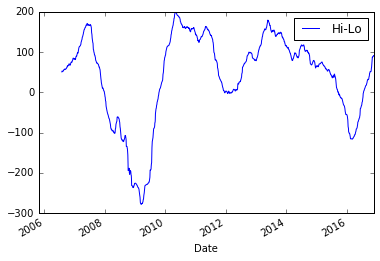

In [268]:
nhnl = nh.merge(nl,on='Date')
nhnl['Hi-Lo'] = nhnl['NewHighs'] - nhnl['NewLows']
del nhnl['NewHighs']
del nhnl['NewLows']


nhnl['Hi-Lo'] = nhnl['Hi-Lo'].rolling(window=200,center=False).mean()
nhnl.set_index('Date',inplace=True)
print nhnl.head(),nhnl.tail()
nhnl.plot()

In [269]:
#nhnl['Hi-Lo'] = pd.qcut(nhnl['Hi-Lo'],4,labels=False)
#nhnl.tail()

        Date    AdvVol    DecVol  Adv-DecVol
0 1990-01-02  124086.0   24562.0     99524.0
1 1990-01-03  101752.0   74079.0     27673.0
2 1990-01-04   55578.0  103932.0    -48354.0
3 1990-01-05   45872.0  100470.0    -54598.0
4 1990-01-08   71311.0   50671.0     20640.0
            Adv-DecVol
Date                  
1990-01-02         NaN
1990-01-03         NaN
1990-01-04         NaN
1990-01-05         NaN
1990-01-08         NaN               Adv-DecVol
Date                    
2016-11-14  2.616295e+08
2016-11-15  2.630938e+08
2016-11-16  2.483271e+08
2016-11-17  2.640855e+08
2016-11-18  2.578440e+08


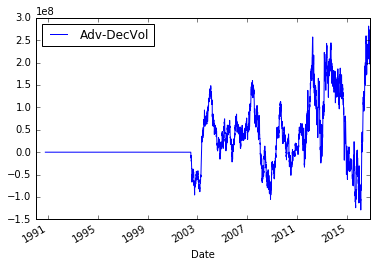

In [270]:
adv_dec_vol = adv_vol.merge(dec_vol,on='Date')
adv_dec_vol['Adv-DecVol'] = adv_dec_vol['AdvVol'] - adv_dec_vol['DecVol']
print adv_dec_vol.head()
del adv_dec_vol['AdvVol']
del adv_dec_vol['DecVol']

adv_dec_vol['Adv-DecVol'] = adv_dec_vol['Adv-DecVol'].rolling(window=200,center=False).mean()
adv_dec_vol.set_index('Date',inplace=True)
print adv_dec_vol.head(), adv_dec_vol.tail()

adv_dec_vol.plot()

In [271]:
#adv_dec_vol['Adv-DecVol'] = pd.qcut(adv_dec_vol['Adv-DecVol'],4,labels=False)
#adv_dec_vol.tail()

        Date     Adv    Dec  Adv-Dec
0 1990-01-02  1257.0  412.0    845.0
1 1990-01-03   887.0  724.0    163.0
2 1990-01-04   645.0  924.0   -279.0
3 1990-01-05   591.0  931.0   -340.0
4 1990-01-08   805.0  717.0     88.0
            Adv-Dec
Date               
1990-01-02      NaN
1990-01-03      NaN
1990-01-04      NaN
1990-01-05      NaN
1990-01-08      NaN             Adv-Dec
Date               
2016-11-14  219.760
2016-11-15  222.310
2016-11-16  218.775
2016-11-17  227.680
2016-11-18  236.235


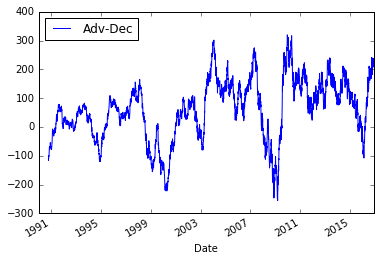

In [272]:
adv_dec = adv.merge(dec,on='Date')
adv_dec['Adv-Dec'] = adv_dec['Adv'] - adv_dec['Dec']
print adv_dec.head()
del adv_dec['Adv']
del adv_dec['Dec']

adv_dec['Adv-Dec'] = adv_dec['Adv-Dec'].rolling(window=200,center=False).mean()

adv_dec.set_index('Date',inplace=True)
print adv_dec.head(), adv_dec.tail()

adv_dec.plot()

In [273]:
#adv_dec['Adv-Dec'] = pd.qcut(adv_dec['Adv-Dec'],4,labels=False)
#adv_dec.tail()

In [274]:
vix = pd.read_sql_query("SELECT * \
                        FROM vix ", engine, parse_dates={'Date':'%Y-%m-%d'})
vix = vix[['Date','Adjusted Close']]
vix.columns = ['Date','VIX']
vix.head(), vix.tail()

(        Date        VIX
 0 1990-01-02  17.240000
 1 1990-01-03  18.190001
 2 1990-01-04  19.219999
 3 1990-01-05  20.110001
 4 1990-01-08  20.260000,            Date    VIX
 6772 2016-11-14  14.48
 6773 2016-11-15  13.37
 6774 2016-11-16  13.72
 6775 2016-11-17  13.35
 6776 2016-11-18  12.85)

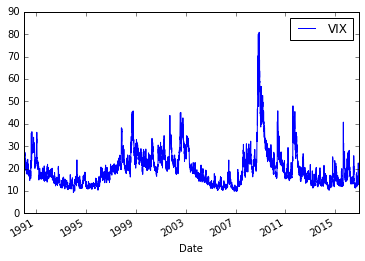

In [275]:
vix.set_index('Date',inplace=True)
vix.plot()

In [276]:
#vix['VIX'] = pd.qcut(vix['VIX'],4,labels=False)
#vix.tail()

        Date  PE_Ratio
0 1990-01-01     15.13
1 1990-02-01     14.97
2 1990-03-01     15.62
3 1990-04-01     15.70
4 1990-05-01     16.37           Date  PE_Ratio
317 2016-06-01     23.97
318 2016-07-01     24.72
319 2016-08-01     24.98
320 2016-09-01     24.82
321 2016-10-01     24.53


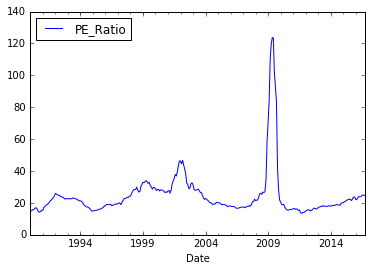

In [288]:
pe_ratio = pd.read_sql_query("SELECT Date, Value as PE_Ratio \
                             FROM pe_ratio_sp500 \
                             WHERE Date > '1990-01-01'",engine, parse_dates={'Date':'%Y-%m-%d'})
print pe_ratio.head(), pe_ratio.tail()
pe_ratio.set_index('Date',inplace=True)
pe_ratio.plot()

In [278]:
#pe_ratio['PE_Ratio'] = pd.qcut(pe_ratio['PE_Ratio'],4,labels=False)
#pe_ratio.head()

In [279]:
sp = pd.read_sql_query("SELECT * \
                        FROM sp500 \
                        WHERE Date > '1990-01-02'", engine, parse_dates={'Date':'%Y-%m-%d'})
sp = sp[['Date','Adjusted Close']]
sp.columns = ['Date','SP']
sp['SP_200_MA'] = sp['SP']
sp['SP_200_MA'] = sp['SP_200_MA'].rolling(window=200).mean()
sp['SP_Minus_MA'] = sp['SP'] - sp['SP_200_MA']
sp.head(), sp.tail()

(        Date          SP  SP_200_MA  SP_Minus_MA
 0 1990-01-02  359.690002        NaN          NaN
 1 1990-01-03  358.760010        NaN          NaN
 2 1990-01-04  355.670013        NaN          NaN
 3 1990-01-05  352.200012        NaN          NaN
 4 1990-01-08  353.790009        NaN          NaN,
            Date           SP    SP_200_MA  SP_Minus_MA
 6772 2016-11-14  2164.199951  2090.647195    73.552756
 6773 2016-11-15  2180.389893  2092.033994    88.355899
 6774 2016-11-16  2176.939941  2093.356044    83.583897
 6775 2016-11-17  2187.120117  2094.714395    92.405722
 6776 2016-11-18  2181.899902  2096.223644    85.676258)

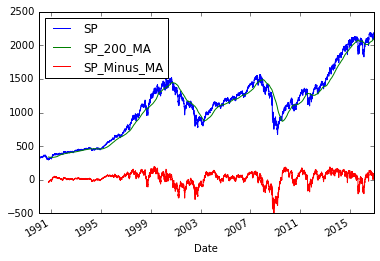

In [280]:
sp.set_index('Date',inplace=True)
sp.plot()

In [281]:
#sp['SP_Minus_MA'] = pd.qcut(sp['SP_Minus_MA'], 4, labels=False)
del sp['SP_200_MA']
sp.tail()

,SP,SP_Minus_MA
Date,,
2016-11-14,2164.199951,73.552756
2016-11-15,2180.389893,88.355899
2016-11-16,2176.939941,83.583897
2016-11-17,2187.120117,92.405722
2016-11-18,2181.899902,85.676258


,OtherMkts,OthMktsMinusMA
Date,,
2016-11-11,1021.13,-2.09815
2016-11-14,1013.55,-10.08410
2016-11-15,1015.50,-8.61150
2016-11-16,1015.08,-9.52010
2016-11-17,1018.65,-6.51440


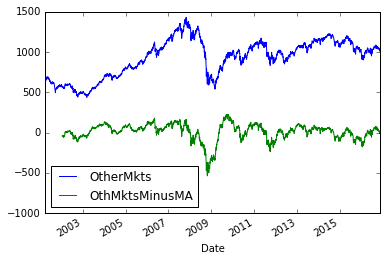

In [286]:
foreign_mkts = pd.read_sql("SELECT Date, IndexValue as OtherMkts \
                           FROM global_ex_us \
                           WHERE Date < '2016-11-18' \
                           ORDER BY Date",engine, parse_dates={'Date':'%Y-%m-%d'})

foreign_mkts.set_index('Date',inplace=True)
foreign_mkts['200_MA'] = foreign_mkts['OtherMkts']
foreign_mkts['200_MA'] = foreign_mkts['200_MA'].rolling(window=200).mean()
foreign_mkts['OthMktsMinusMA'] = foreign_mkts['OtherMkts'] - foreign_mkts['200_MA']
del foreign_mkts['200_MA']
foreign_mkts.plot()
foreign_mkts.tail()

In [287]:
other_mkts = foreign_mkts['OthMktsMinusMA']

In [289]:
master_df = sentiment

df_list = [yield_curve, nhnl, adv_dec, vix, pe_ratio, other_mkts, sp]

for df in df_list:
     master_df = master_df.join(df, how='outer')

In [290]:
master_df.head(), master_df.tail()

(            BullBearSpread  OneTenDiff  Hi-Lo  Adv-Dec        VIX  PE_Ratio  \
 Date                                                                          
 1990-01-01             NaN         NaN    NaN      NaN        NaN     15.13   
 1990-01-02             NaN      0.1194    NaN      NaN  17.240000       NaN   
 1990-01-03             NaN      0.1207    NaN      NaN  18.190001       NaN   
 1990-01-04             NaN      0.1344    NaN      NaN  19.219999       NaN   
 1990-01-05             0.1      0.1627    NaN      NaN  20.110001       NaN   
 
             OthMktsMinusMA          SP  SP_Minus_MA  
 Date                                                 
 1990-01-01             NaN         NaN          NaN  
 1990-01-02             NaN  359.690002          NaN  
 1990-01-03             NaN  358.760010          NaN  
 1990-01-04             NaN  355.670013          NaN  
 1990-01-05             NaN  352.200012          NaN  ,
             BullBearSpread  OneTenDiff   Hi-Lo  Adv

In [291]:
master_df = master_df.fillna(method='ffill')
master_df.head(),master_df.tail()

(            BullBearSpread  OneTenDiff  Hi-Lo  Adv-Dec        VIX  PE_Ratio  \
 Date                                                                          
 1990-01-01             NaN         NaN    NaN      NaN        NaN     15.13   
 1990-01-02             NaN      0.1194    NaN      NaN  17.240000     15.13   
 1990-01-03             NaN      0.1207    NaN      NaN  18.190001     15.13   
 1990-01-04             NaN      0.1344    NaN      NaN  19.219999     15.13   
 1990-01-05             0.1      0.1627    NaN      NaN  20.110001     15.13   
 
             OthMktsMinusMA          SP  SP_Minus_MA  
 Date                                                 
 1990-01-01             NaN         NaN          NaN  
 1990-01-02             NaN  359.690002          NaN  
 1990-01-03             NaN  358.760010          NaN  
 1990-01-04             NaN  355.670013          NaN  
 1990-01-05             NaN  352.200012          NaN  ,
             BullBearSpread  OneTenDiff   Hi-Lo  Adv

In [ ]:
#master_df.to_csv('market_direction.csv')

In [295]:
master_df.dropna(inplace=True)
master_df['BullBearSpread'] = pd.qcut(master_df['BullBearSpread'],3,labels=False)
master_df['OneTenDiff'] = pd.qcut(master_df['OneTenDiff'],3,labels=False)
master_df['Hi-Lo'] = pd.qcut(master_df['Hi-Lo'],2,labels=False)
master_df['Adv-Dec'] = pd.qcut(master_df['Adv-Dec'],2,labels=False)
master_df['VIX'] = pd.qcut(master_df['VIX'],3,labels=False)
master_df['PE_Ratio'] = pd.qcut(master_df['PE_Ratio'],3,labels=False)
master_df['OthMktsMinusMA'] = pd.qcut(master_df['OthMktsMinusMA'],2,labels=False)
master_df['SP_Minus_MA'] = pd.qcut(master_df['SP_Minus_MA'],2,labels=False)
master_df.head()

,BullBearSpread,OneTenDiff,Hi-Lo,Adv-Dec,VIX,PE_Ratio,OthMktsMinusMA,SP,SP_Minus_MA
Date,,,,,,,,,
2006-08-02,0,0,0,0,0,0,1,1277.410034,0
2006-08-03,0,0,0,1,0,0,1,1280.270020,0
2006-08-04,0,0,0,1,0,0,1,1279.359985,0
2006-08-07,0,0,0,0,1,0,1,1275.770020,0
2006-08-08,0,0,0,0,1,0,1,1271.479980,0


In [296]:
#master_df.to_csv('market_direction_int.csv')